# Rank Sum Test
#### https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
#### https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

In [1]:
# csv to open files, plt and np to plot
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib import image

In [2]:
# functions to open and read csv files w/ annotations
def openCSV_getData_computer(file_csv):
    file = open(file_csv)
    type(file)
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    rows = rows[3:]
    data = []
    for i in range(len(rows)):
        temp = rows[i][:]
        temp.pop(-1)
        temp.pop(15)
        temp.pop(12)
        temp.pop(9)
        temp.pop(6)
        temp.pop(3)
        temp.pop(0)
        data.append(temp)
    return data

def distanceBetweenPoints(x1, y1, x2, y2):
    xDiff = abs(x2 - x1)
    yDiff = abs(y2 - y1)
    xDiff = xDiff**2
    yDiff = yDiff**2
    distance = xDiff + yDiff
    distance = math.pow(distance, 1/2)
    return distance

def removeScorer_otherInfo(csv_file):
    # remove indeces 0-3
    data = csv_file[3:]
    imgNames = []
    for i in range(len(data)):
        imgNames.append(data[i][2])
        temp = data[i]
        temp = temp[3:]
        data[i] = temp
    return [data, imgNames]
#b1_c1_j = removeScorer_otherInfo(rows)

def openCSV_getData(file_csv):
    file = open(file_csv)
    type(file)
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    temp = removeScorer_otherInfo(rows)
    data = temp[0]
    imgNames = temp[1]
    return data, imgNames

def correctImages(img):
    new = []
    numbs = []
    for i in range(len(img)):
        temp = 'frame' 
        t = img[i][3:7] 
        if t[0] == "0":
            t = t[1:]
        temp = temp + t + '.jpg'
        numbs.append(t)
        new.append(temp)
    return new, numbs

In [3]:
# Computer

# length = # of images annotated , 6 body part labels in each
folder = '/Users/betinakreiman/Desktop/Life/research/2022/comparing_csv_annotations/computer_labels_3cam/'
b1_j_computer = openCSV_getData_computer(folder + 'Block0001_Cam1DLC_resnet50_Demo_220728Jul29shuffle1_100000.csv')
b2_j_computer = openCSV_getData_computer(folder + 'Block0001_Cam2DLC_resnet50_Demo_220728Jul29shuffle1_100000.csv')
b3_j_computer = openCSV_getData_computer(folder + 'Block0001_Cam3DLC_resnet50_Demo_220728Jul29shuffle1_100000.csv')

b1_k_computer = openCSV_getData_computer(folder + 'Block0001_Cam1DLC_resnet50_3d_analysisJul29shuffle1_1030000.csv')
b2_k_computer = openCSV_getData_computer(folder + 'Block0001_Cam2DLC_resnet50_3d_analysisJul29shuffle1_1030000.csv')
b3_k_computer = openCSV_getData_computer(folder + 'Block0001_Cam3DLC_resnet50_3d_analysisJul29shuffle1_1030000.csv')


In [4]:
# Human

kreiman_csv = "/Users/betinakreiman/Desktop/Life/research/2022/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (1).csv"
jaeson_csv = "/Users/betinakreiman/Desktop/Life/research/2022/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam1.csv"

kreiman_1 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (1).csv")
b1_k, img1_k = kreiman_1[0], kreiman_1[1]
kreiman_2 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (2).csv")
b2_k, img2_k = kreiman_2[0], kreiman_2[1]
kreiman_3 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/comparing_csv_annotations/3d_csv_files/CollectedData_Kreiman (3).csv")
b3_k, img3_k = kreiman_3[0], kreiman_3[1]


jaeson_1 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam1.csv")
b1_j, img1_j = jaeson_1[0], jaeson_1[1]
jaeson_2 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam2.csv")
b2_j, img2_j = jaeson_2[0], jaeson_2[1]
jaeson_3 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/comparing_csv_annotations/3d_csv_files/CollectedData_Jaeson_Block1Cam3.csv")
b3_j, img3_j = jaeson_3[0], jaeson_3[1]

imgs, numbers = correctImages(img1_k)


In [6]:
def distance_computer(kreiman, jaeson):
    dists = []
    for i in range(len(kreiman)):
        for bodyPart in range(6):
            k_x = float(kreiman[i][bodyPart*2])
            j_x = float(jaeson[i][bodyPart*2])
            k_y = float(kreiman[i][bodyPart*2+1])
            j_y = float(jaeson[i][bodyPart*2+1])
            dist = distanceBetweenPoints(k_x, k_y, j_x, j_y)
            dists.append(dist)
    
    return dists
distances_cam1_computer = distance_computer(b1_k_computer, b1_j_computer)
distances_cam2_computer = distance_computer(b2_k_computer, b2_j_computer)
distances_cam3_computer = distance_computer(b3_k_computer, b3_j_computer)

In [7]:
def distance_human(kreiman, jaeson):
    dists = []
    for i in range(len(kreiman)):
        for bodyPart in range(6):
            if kreiman[i][bodyPart*2] != '' and kreiman[i][bodyPart*2+1] != '' and jaeson[i][bodyPart*2] != '' and jaeson[i][bodyPart*2+1] != '':
                k_x = float(kreiman[i][bodyPart*2])
                j_x = float(jaeson[i][bodyPart*2])
                k_y = float(kreiman[i][bodyPart*2+1])
                j_y = float(jaeson[i][bodyPart*2+1])
                dist = distanceBetweenPoints(k_x, k_y, j_x, j_y)
                dists.append(dist)
    
    return dists
distances_cam1_human = distance_human(b1_k, b1_j)
distances_cam2_human = distance_human(b2_k, b2_j)
distances_cam3_human = distance_human(b3_k, b3_j)


In [8]:
def distance_human_parts(kreiman, jaeson):
    dists = [[], [], [], [], [], []]
    for i in range(len(kreiman)):
        for bodyPart in range(6):
            if kreiman[i][bodyPart*2] != '' and kreiman[i][bodyPart*2+1] != '' and jaeson[i][bodyPart*2] != '' and jaeson[i][bodyPart*2+1] != '':
                k_x = float(kreiman[i][bodyPart*2])
                j_x = float(jaeson[i][bodyPart*2])
                k_y = float(kreiman[i][bodyPart*2+1])
                j_y = float(jaeson[i][bodyPart*2+1])
                dist = distanceBetweenPoints(k_x, k_y, j_x, j_y)
                dists[bodyPart].append(dist)
    
    return dists
distances_cam1_human_parts = distance_human_parts(b1_k, b1_j)
distances_cam2_human_parts = distance_human_parts(b2_k, b2_j)
distances_cam3_human_parts = distance_human_parts(b3_k, b3_j)


In [9]:
from scipy.stats import f_oneway
print(f_oneway(distances_cam1_human_parts[0], distances_cam1_human_parts[1], distances_cam1_human_parts[2], 
        distances_cam1_human_parts[3], distances_cam1_human_parts[4], distances_cam1_human_parts[5]))



F_onewayResult(statistic=112.78078989309674, pvalue=2.6367251743879085e-64)


In [10]:
from scipy.stats import f_oneway
distances_cam2_human_parts
#print(f_oneway(distances_cam2_human_parts[0], distances_cam2_human_parts[1], distances_cam2_human_parts[2], 
        #distances_cam2_human_parts[3], distances_cam2_human_parts[4], distances_cam2_human_parts[5]))


[[45.72518810561087,
  48.65137855207234,
  54.32059729472327,
  44.68746167070421,
  39.25609959583459,
  36.09330373214216,
  30.319450442336407,
  45.18449968259783,
  26.94446468426658,
  25.819681208940533,
  28.742356154981884,
  38.70975853845234,
  35.849999333807666,
  35.253461808430814,
  34.29136674956571,
  30.426176120140255,
  36.278584141788606,
  28.16317200786604,
  44.479663262847495,
  25.888283764420848,
  33.52966604271555,
  33.54671792127917,
  28.79648256889204,
  27.77241766877189,
  61.361561429873994,
  23.92901914421447,
  13.024387902081967,
  35.3807764289083,
  35.4147750503705,
  20.973924383459366,
  27.173670604558048,
  36.61619921984939,
  35.02098114516706,
  31.682770472425762,
  15.094528581670662,
  36.505557901516205,
  33.80813914926932,
  36.897103158193545,
  19.203565513604794,
  22.18874953117921,
  26.961031020957197,
  24.755198793073433,
  26.226966243848107,
  22.182601833714674,
  31.843113209690888,
  28.81609467814544,
  22.16017375

In [11]:
from scipy.stats import f_oneway
print(f_oneway(distances_cam3_human_parts[0], distances_cam3_human_parts[1], distances_cam3_human_parts[2], 
        distances_cam3_human_parts[3], distances_cam3_human_parts[4], distances_cam3_human_parts[5]))

F_onewayResult(statistic=nan, pvalue=nan)


/Users/betinakreiman/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


In [12]:
print(np.mean(distances_cam1_human))
print(np.std(distances_cam1_human))
print(len(distances_cam1_human))
print()
print(np.mean(distances_cam2_human))
print(np.std(distances_cam2_human))
print(len(distances_cam2_human))
print()
print(np.mean(distances_cam3_human))
print(np.std(distances_cam3_human))
print(len(distances_cam3_human))
print()

19.410517161010528
14.021129768553736
279

24.253715693958615
10.511279875316532
224

20.706179814778732
28.305046927249133
199



In [13]:
distances_computer = distances_cam1_computer + distances_cam2_computer + distances_cam3_computer
distances_human = distances_cam1_human + distances_cam2_human + distances_cam3_human


In [14]:
print("computer: ", np.mean(distances_computer))
print("human: ", np.mean(distances_human))

computer:  45.29798993206539
human:  21.323214225797198


In [15]:
import numpy as np
from scipy.stats import ranksums

In [16]:
# all data

ranksums(distances_computer, distances_human)

RanksumsResult(statistic=7.258291162583461, pvalue=3.9201102968910024e-13)

In [17]:
# LP CAM 2

ranksums(distances_cam2_computer, distances_cam2_human)

RanksumsResult(statistic=4.173505429101885, pvalue=2.9994850988948496e-05)

In [18]:
# RP Cam 3

ranksums(distances_cam3_computer, distances_cam3_human)

RanksumsResult(statistic=6.817571969896774, pvalue=9.259202250784404e-12)

In [19]:
# P CAM 1

ranksums(distances_cam1_computer, distances_cam1_human)

RanksumsResult(statistic=0.6523685943790732, pvalue=0.5141634191740198)

In [20]:
print(np.mean(distances_cam1_computer), np.mean(distances_cam1_human))
print(abs(np.mean(distances_cam1_computer) - np.mean(distances_cam1_human)))

23.595263071616717 19.410517161010528
4.184745910606189


In [21]:
# HUMAN!!! 
print("1 and 2:", ranksums(distances_cam1_human, distances_cam2_human))
print("1 and 3:", ranksums(distances_cam1_human, distances_cam3_human))
print("2 and 3:", ranksums(distances_cam2_human, distances_cam3_human))

1 and 2: RanksumsResult(statistic=-5.266850482818285, pvalue=1.3878414954983137e-07)
1 and 3: RanksumsResult(statistic=0.9192614081444754, pvalue=0.35795885822491946)
2 and 3: RanksumsResult(statistic=7.937067750717064, pvalue=2.070169831690341e-15)


In [68]:
# camera parts between humans
f_oneway(distances_cam1_human, distances_cam2_human, distances_cam3_human)

F_onewayResult(statistic=4.415882085156975, pvalue=0.012422848917963455)

In [83]:
all_parts = [[], [], [], [], [], []]
cams_parts = [distances_cam1_human_parts, distances_cam2_human_parts, distances_cam3_human_parts]

for i in range(len(cams_parts)):
    for j in range(6):
        for k in range(len(cams_parts[i][j])):
            all_parts[j].append(cams_parts[i][j][k])

In [84]:
print(f_oneway(all_parts[0], all_parts[1], all_parts[2],
               all_parts[3], all_parts[4], all_parts[5]))


F_onewayResult(statistic=6.726437204983047, pvalue=3.911998681705012e-06)


In [74]:
# body parts between humans
print("CAMERA 1: ", f_oneway(distances_cam1_human_parts[0], distances_cam1_human_parts[1], distances_cam1_human_parts[2],
                            distances_cam1_human_parts[3], distances_cam1_human_parts[4], distances_cam1_human_parts[5]))

print("CAMERA 2: ", f_oneway(distances_cam2_human_parts[0], distances_cam2_human_parts[1], distances_cam2_human_parts[2],
                            distances_cam2_human_parts[3], distances_cam2_human_parts[4], distances_cam2_human_parts[5]))

print("CAMERA 3: ", f_oneway(distances_cam3_human_parts[0], distances_cam3_human_parts[1], distances_cam3_human_parts[2],
                            distances_cam3_human_parts[3], distances_cam3_human_parts[4], distances_cam3_human_parts[5]))



CAMERA 1:  F_onewayResult(statistic=112.78078989309674, pvalue=2.6367251743879085e-64)
CAMERA 2:  F_onewayResult(statistic=nan, pvalue=nan)
CAMERA 3:  F_onewayResult(statistic=nan, pvalue=nan)


In [67]:
len(distances_cam1_human_parts[0])

50

In [22]:
# cam1-comp and human
ranksums(distances_cam1_computer, distances_human)

RanksumsResult(statistic=-1.763261574191876, pvalue=0.0778563829718975)

In [23]:
# Cross Validate Data

In [38]:
# length = # of images annotated , 6 body part labels in each
folder = '/Users/betinakreiman/Desktop/Life/research/2022/comparing_csv_annotations/computer_labels_3cam/'
cross_b1_j_computer = openCSV_getData_computer(folder + 'Block0001_Cam1DLC_resnet50_Demo_220728Jul29shuffle1_100000.csv')
cross_b2_j_computer = openCSV_getData_computer(folder + 'Block0001_Cam2DLC_resnet50_Demo_220728Jul29shuffle1_100000.csv')
cross_b3_j_computer = openCSV_getData_computer(folder + 'Block0001_Cam3DLC_resnet50_Demo_220728Jul29shuffle1_100000.csv')

cross_b1_k_computer = openCSV_getData_computer(folder + 'Block0001_Cam1DLC_resnet50_3d_analysisJul29shuffle1_1030000.csv')
cross_b2_k_computer = openCSV_getData_computer(folder + 'Block0001_Cam2DLC_resnet50_3d_analysisJul29shuffle1_1030000.csv')
cross_b3_k_computer = openCSV_getData_computer(folder + 'Block0001_Cam3DLC_resnet50_3d_analysisJul29shuffle1_1030000.csv')

#b1_, img1_ = openCSV_getData(folder + '')
#b2_, img2_ = openCSV_getData(folder + '')
#b3_, img3_ = openCSV_getData(folder + '')

In [40]:
cross_kreiman_1 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/Figures/Figure5/cam1NewAnnotations-Kreiman-2022-10-05/labeled-data/Block0001_Cam1/CollectedData_Kreiman.csv")
cross_b1_k, cross_img1_k = cross_kreiman_1[0], cross_kreiman_1[1]
cross_kreiman_2 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/Figures/Figure5/cam1NewAnnotations-Kreiman-2022-10-05/labeled-data/Block0001_Cam2/CollectedData_Kreiman.csv")
cross_b2_k, cross_img2_k = cross_kreiman_2[0], cross_kreiman_2[1]
cross_kreiman_3 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/Figures/Figure5/cam1NewAnnotations-Kreiman-2022-10-05/labeled-data/Block0001_Cam3/CollectedData_Kreiman.csv")
cross_b3_k, cross_img3_k = cross_kreiman_3[0], cross_kreiman_3[1]


cross_jaeson_1 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/Figures/Figure5/labeled-data_Jaeson/Block0001_Cam1/CollectedData_Jaeson.csv")
cross_b1_j, cross_img1_j = cross_jaeson_1[0], cross_jaeson_1[1]
cross_jaeson_2 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/Figures/Figure5/labeled-data_Jaeson/Block0001_Cam2/CollectedData_Jaeson.csv")
cross_b2_j, cross_img2_j = cross_jaeson_2[0], cross_jaeson_2[1]
cross_jaeson_3 = openCSV_getData("/Users/betinakreiman/Desktop/Life/research/2022/Figures/Figure5/labeled-data_Jaeson/Block0001_Cam3/CollectedData_Jaeson.csv")
cross_b3_j, cross_img3_j = cross_jaeson_3[0], cross_jaeson_3[1]



In [41]:
def getIndecesCrossValidation(imgs):
    index = []
    for i in range(len(imgs)):
        temp = imgs[i][:-4]
        temp = temp[5:]
        index.append(temp)
    return index
indeces_1 = getIndecesCrossValidation(cross_img1_k)
indeces_2 = getIndecesCrossValidation(cross_img2_k)
indeces_3 = getIndecesCrossValidation(cross_img3_k)

In [42]:
def distance_computer_cross(kreiman, jaeson, indexs):
    dists = []
    for i in range(len(indexs)):
        for bodyPart in range(6):
            ind = int(indexs[i])
            k_x = float(kreiman[ind][bodyPart*2])
            j_x = float(jaeson[ind][bodyPart*2])
            k_y = float(kreiman[ind][bodyPart*2+1])
            j_y = float(jaeson[ind][bodyPart*2+1])
            dist = distanceBetweenPoints(k_x, k_y, j_x, j_y)
            dists.append(dist)
    
    return dists
cross_distances_cam1_computer = distance_computer_cross(b1_k_computer, b1_j_computer, indeces_1)
cross_distances_cam2_computer = distance_computer_cross(b2_k_computer, b2_j_computer, indeces_2)
cross_distances_cam3_computer = distance_computer_cross(b3_k_computer, b3_j_computer, indeces_1)

In [43]:
cross_distances_cam1_human = distance_human(cross_b1_k, cross_b1_j)
cross_distances_cam2_human = distance_human(cross_b2_k, cross_b2_j)
cross_distances_cam3_human = distance_human(cross_b3_k, cross_b3_j)

In [44]:
print(np.mean(cross_distances_cam1_human))

11.283387713006709


In [45]:
cross_distances_computer = cross_distances_cam1_computer + cross_distances_cam2_computer + cross_distances_cam3_computer
cross_distances_human = cross_distances_cam1_human + cross_distances_cam2_human + cross_distances_cam3_human


In [46]:
print(np.mean(cross_distances_computer))
print(np.std(cross_distances_computer))

print()

print(np.mean(cross_distances_human))
print(np.std(cross_distances_human))

45.65298283792776
66.34671898455704

12.716295068464873
9.577076727202408


In [47]:
# cross all data

In [48]:
ranksums(cross_distances_computer, cross_distances_human)

RanksumsResult(statistic=10.727005568043591, pvalue=7.601975902486338e-27)

In [49]:
import numpy as np
def crossValidate(human, computer, indexs):
    differences = []
    avg = 0
    count = 0
    for i in range(len(human)):
        compIndex = int(indexs[i])
        #print(compIndex)
        for d in range(6):
            h_x, h_y = 0, 0
            
            c_x, c_y = float(computer[compIndex][d*2]), float(computer[compIndex][d*2+1])
            distance = 0
            if human[i][d*2] != '' and human[i][d*2+1] != '':
                h_x, h_y = float(human[i][d*2]), float(human[i][d*2+1])
                distance = distanceBetweenPoints(h_x, h_y, c_x, c_y)
                differences.append(distance)
            
            
    print("avg is ", np.mean(differences))
    print("std is ", np.std(differences))
    print()
    return differences, avg

diff_k_1, average_k_1 = crossValidate(cross_b1_k, cross_b1_k_computer, indeces_1)

diff_k_2, average_k_2 = crossValidate(cross_b2_k, cross_b2_k_computer, indeces_2)

diff_k_3, average_k_3 = crossValidate(cross_b3_k, cross_b3_k_computer, indeces_3)


avg is  15.605184670606464
std is  37.536086677795005

avg is  10.994523785418014
std is  21.13158648839041

avg is  8.695364205354922
std is  4.116366298897726



In [50]:
diff_j_1, average_j_1 = crossValidate(cross_b1_j, cross_b1_j_computer, indeces_1)

diff_j_2, average_j_2 = crossValidate(cross_b2_j, cross_b2_j_computer, indeces_2)

diff_j_3, average_j_3 = crossValidate(cross_b3_j, cross_b3_j_computer, indeces_3)

avg is  10.526031189655642
std is  7.700235900224916

avg is  25.24974728875052
std is  25.073592934985953

avg is  21.590842802948966
std is  29.18646060267376



In [51]:
diff_cross_k = diff_k_1 + diff_k_2 + diff_k_3
diff_cross_j = diff_j_1 + diff_j_2 + diff_j_3

In [52]:
print(np.mean(diff_cross_j))
print(np.std(diff_cross_j))

18.330507728850137
22.403577810974905


In [53]:
d = diff_cross_k + diff_cross_j

In [54]:
# h-h vs h-c
ranksums(d, cross_distances_human)

RanksumsResult(statistic=-0.25162965727392894, pvalue=0.801327332865304)

In [55]:
print(np.mean(cross_distances_human))
print(np.std(cross_distances_human))

12.716295068464873
9.577076727202408


In [56]:
ranksums(diff_cross_j, diff_cross_k)

RanksumsResult(statistic=7.029306406434272, pvalue=2.0756272038222285e-12)

In [57]:
ranksums(diff_k_1, diff_j_1)

RanksumsResult(statistic=0.06063699049434586, pvalue=0.9516483135580246)

In [58]:
ranksums(diff_k_2, diff_j_2)

RanksumsResult(statistic=-8.280961321473123, pvalue=1.2218487359983427e-16)

In [59]:
ranksums(diff_k_3, diff_j_3)

RanksumsResult(statistic=-4.62331315872866, pvalue=3.7765891305401234e-06)

In [60]:
diff_cross_1 = diff_k_1 + diff_j_1
print(np.mean(diff_cross_1))
print(np.std(diff_cross_1))

13.054892416458161
27.161142472942803


In [61]:
ranksums(diff_k_2, diff_j_2)

RanksumsResult(statistic=-8.280961321473123, pvalue=1.2218487359983427e-16)

In [62]:
ranksums(diff_k_3, diff_j_3)

RanksumsResult(statistic=-4.62331315872866, pvalue=3.7765891305401234e-06)

In [63]:
for i in range(5):
    print(diff_cross_k[i])
    print(diff_cross_j[i])
    print()

12.287548598991338
9.676215413954399

4.046851240414639
14.51968904358481

196.17699565427077
14.239064073444357

8.891256658211534
3.7901440760366025

6.332524686203278
3.099348419324357



In [64]:
# creating bar graph

In [65]:
d = diff_cross_k + diff_cross_j
d_1 = diff_k_1 + diff_j_1
d_2 = diff_k_2 + diff_j_2
d_3 = diff_k_3 + diff_j_3

In [141]:
print(np.mean(d))
print(np.std(d))

15.276794363281956
24.95440211041375


Text(0, 0.5, 'Distance (px)')

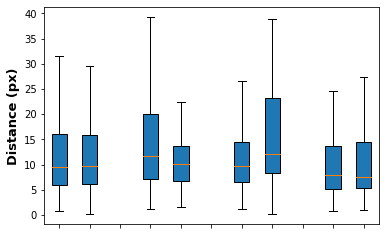

In [142]:
# distnaces, distances_cam1, distances_cam2, distances_cam3, 
# distances_lf, distances_lk, distances_lt
# distances_rf, distances_rk, distances_rt

fig, ax = plt.subplots()

data = [d, cross_distances_human, [], d_2, cross_distances_cam2_human, [], d_3, cross_distances_cam3_human, [], d_1, cross_distances_cam1_human]
#data_1 = [d, [], d_2, d_3, d_1]
#data_2 = [cross_distances_human, [], cross_distances_cam2_human, cross_distances_cam3_human, cross_distances_cam1_human]



xtick = []
c = "red"
ax.boxplot(data, showfliers=False, patch_artist=True)
#ax2.boxplot(data_2, showfliers=False, patch_artist=True,
            #boxprops=dict(facecolor="blue", color="blue"))
ax.set_xticklabels(xtick)

ax.set_ylabel("Distance (px)", fontweight ='bold', fontsize = 13)
#plt.savefig('/Users/betinakreiman/Desktop/figs/fig2c.pdf', format='pdf')


In [59]:
cross_distances_computer = cross_distances_cam1_computer

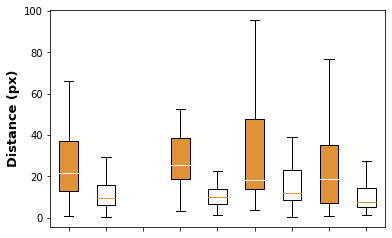

In [128]:
import matplotlib.pyplot as plt
import numpy as np

data_1 = [cross_distances_computer, [], cross_distances_cam2_computer, cross_distances_cam3_computer, cross_distances_cam1_computer]
data_2 = [cross_distances_human, cross_distances_cam2_human, cross_distances_cam3_human, cross_distances_cam1_human]


#plt.figure(figsize=(4,3))
# option 1, specify props dictionaries
c = "#e19136"
plt.boxplot(data_1, positions=[1,3,4,6,8], notch=False, patch_artist=True,
            boxprops=dict(facecolor=c, color="black"),
            #capprops=dict(color=c),
            #whiskerprops=dict(color="black"),
            #flierprops=dict(color="black", markeredgecolor="black"),
            medianprops=dict(color="w"),
            showfliers = False,
            #widths = 0.3
            )


# option 2, set all colors individually
c2 = "#9d9fa2"
box1 = plt.boxplot(data_2, positions=[2,5,7,9], notch=False, patch_artist=True, showfliers=False,
                  medianprops=dict(color="#e19136"),
                   boxprops=dict(facecolor="w", color="black"))
                  #widths = 0.3)

#plt.xlim(0.5,4)
plt.xticks([1,2,3,4,5,6,7,8,9], ["","", None,"","", "", "", "", ""], ha="left")
plt.ylabel("Distance (px)", fontweight ='bold', fontsize = 13)
#plt.setp(ax.xaxis.get_majorticklabels(), rotation=-45, ha="left" )
#plt.setp(ax.xaxis.get_majorticklabels(), ha="left" )
#for label in ax.get_xticklabels(minor=True):
    #label.set_horizontalalignment('right')
#plt.ylim([-2, 45])
#plt.savefig('/Users/betinakreiman/Desktop/figs/fig4b_bar.pdf', format='pdf')
#plt.xaxis.set_minor_locator(AutoMinorLocator())

#plt.tick_params(which="minor", color="r")
plt.show()


Text(0, 0.5, 'Distance (px)')

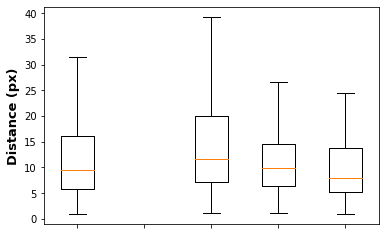

In [61]:
# distnaces, distances_cam1, distances_cam2, distances_cam3, 
# distances_lf, distances_lk, distances_lt
# distances_rf, distances_rk, distances_rt

fig, ax = plt.subplots()

data = [d, [], d_2, d_3, d_1]

xtick = []
ax.boxplot(data, showfliers=False)
ax.set_xticklabels(xtick)
ax.set_ylabel("Distance (px)", fontweight ='bold', fontsize = 13)
#plt.savefig('/Users/betinakreiman/Desktop/figs/fig2c.pdf', format='pdf')


Text(0, 0.5, 'Distance (px)')

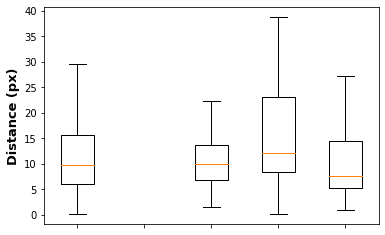

In [62]:
# distnaces, distances_cam1, distances_cam2, distances_cam3, 
# distances_lf, distances_lk, distances_lt
# distances_rf, distances_rk, distances_rt

fig, ax = plt.subplots()

data = [cross_distances_human, [], cross_distances_cam2_human, cross_distances_cam3_human, cross_distances_cam1_human]

xtick = []
ax.boxplot(data, showfliers=False)
ax.set_xticklabels(xtick)
ax.set_ylabel("Distance (px)", fontweight ='bold', fontsize = 13)
#plt.savefig('/Users/betinakreiman/Desktop/figs/fig2c.pdf', format='pdf')


45.65298283792776


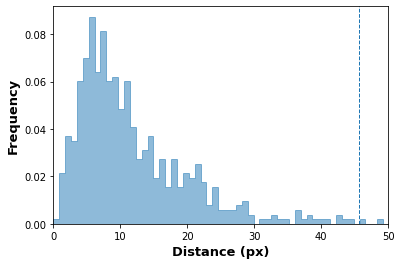

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

noise = np.random.normal(0, 1, (1000, ))
density = stats.gaussian_kde(cross_distances_computer)
n, x, _ = plt.hist(d, bins=np.linspace(0, 175, 200), 
                   histtype=u'step', density=True, fill=True, alpha=0.5)  
#plt.plot(x, density(x))
#plt.plot(x=21.323214225797198)
print(np.mean(cross_distances_computer))
plt.axvline(np.mean(cross_distances_computer), ls='--', linewidth=1)
#ax.vlines(x=21.323214225797198, ymin=0, ymax=200, lw=1)
plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.ylabel("Frequency", fontweight ='bold', fontsize = 13)
plt.xlim([0, 50])
#plt..text(0, 0.5, 'Ratio', va='center', rotation='vertical', fontweight ='bold', fontsize = 13)
plt.savefig('/Users/betinakreiman/Desktop/fig_updates/fig4b_top.pdf', format='pdf')
plt.show()



15.276794363281956


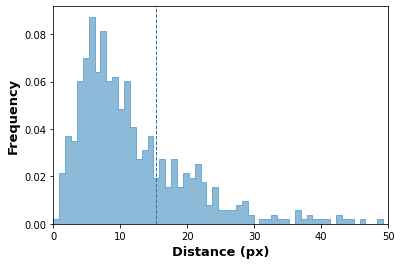

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

noise = np.random.normal(0, 1, (1000, ))
density = stats.gaussian_kde(d)
n, x, _ = plt.hist(d, bins=np.linspace(0, 175, 200), 
                   histtype=u'step', density=True, fill=True, alpha=0.5)  
#plt.plot(x, density(x))
#plt.plot(x=21.323214225797198)
print(np.mean(d))
plt.axvline(np.mean(d), ls='--', linewidth=1)
#ax.vlines(x=21.323214225797198, ymin=0, ymax=200, lw=1)
plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.ylabel("Frequency", fontweight ='bold', fontsize = 13)
plt.xlim([0, 50])
#plt..text(0, 0.5, 'Ratio', va='center', rotation='vertical', fontweight ='bold', fontsize = 13)
plt.savefig('/Users/betinakreiman/Desktop/fig_updates/fig4b_top.pdf', format='pdf')
plt.show()



In [79]:
import random
import numpy
from matplotlib import pyplot
from matplotlib.lines import Line2D

noise = np.random.normal(0, 1, (1000, ))
density = stats.gaussian_kde(distances_computer)
bins=np.linspace(0, 175, 100)



12.716295068464873


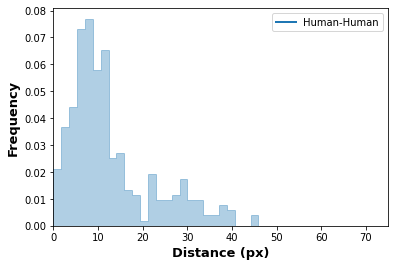

In [137]:
# human
pyplot.hist(cross_distances_human, bins, fill=True, histtype=u'step', density=True, linewidth=1, alpha=0.35)
print(np.mean(cross_distances_human))
custom_lines = [Line2D([0], [0], linewidth=2),
                Line2D([0], [0], color='orange', linewidth=2),
                Line2D([0], [0], color='green', linewidth=2),
               Line2D([0], [0], color='red', linewidth=2)]
pyplot.legend(custom_lines, ["Human-Human"])

plt.xlim([0, 75])
plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.ylabel("Frequency", fontweight ='bold', fontsize = 13)
#plt.savefig('/Users/betinakreiman/Desktop/figs/fig4b/Supplemental_Graphs/fig_s1_human.pdf', format='pdf')
pyplot.show()


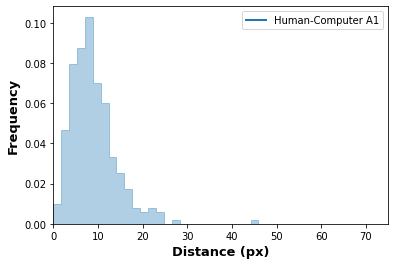

In [132]:
# Model 1
pyplot.hist(diff_cross_k, bins, fill=True, histtype=u'step', density=True, linewidth=1, alpha=0.35)

custom_lines = [Line2D([0], [0], linewidth=2),
                Line2D([0], [0], color='orange', linewidth=2),
                Line2D([0], [0], color='green', linewidth=2),
               Line2D([0], [0], color='red', linewidth=2)]
pyplot.legend(custom_lines, ["Human-Computer A1"])

plt.xlim([0, 75])
plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.ylabel("Frequency", fontweight ='bold', fontsize = 13)
#plt.savefig('/Users/betinakreiman/Desktop/figs/fig4b/Supplemental_Graphs/fig_s1_model_1.pdf', format='pdf')

pyplot.show()

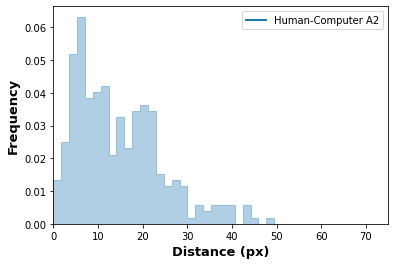

In [134]:
# Model 2
pyplot.hist(diff_cross_j, bins, fill=True, histtype=u'step', density=True, linewidth=1, alpha=0.35)

custom_lines = [Line2D([0], [0], linewidth=2),
                Line2D([0], [0], color='orange', linewidth=2),
                Line2D([0], [0], color='green', linewidth=2),
               Line2D([0], [0], color='red', linewidth=2)]
pyplot.legend(custom_lines, ["Human-Computer A2"])

plt.xlim([0, 75])
plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.ylabel("Frequency", fontweight ='bold', fontsize = 13)
#plt.savefig('/Users/betinakreiman/Desktop/figs/fig4b/Supplemental_Graphs/fig_s1_model_2.pdf', format='pdf')

pyplot.show()

45.65298283792776


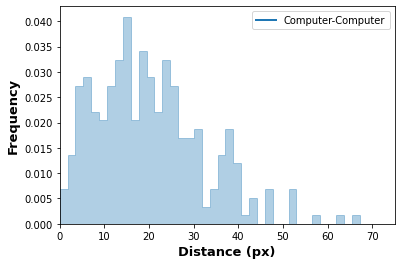

In [144]:
# Computer
pyplot.hist(cross_distances_computer, bins, fill=True, histtype=u'step', density=True, linewidth=1, alpha=0.35)
print(np.mean(cross_distances_computer))
custom_lines = [Line2D([0], [0], linewidth=2),
                Line2D([0], [0], color='orange', linewidth=2),
                Line2D([0], [0], color='green', linewidth=2),
               Line2D([0], [0], color='red', linewidth=2)]
pyplot.legend(custom_lines, ["Computer-Computer"])

plt.xlim([0, 75])
plt.xlabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.ylabel("Frequency", fontweight ='bold', fontsize = 13)
#plt.savefig('/Users/betinakreiman/Desktop/figs/fig4b/Supplemental_Graphs/fig_s1_computer.pdf', format='pdf')

pyplot.show()

## Figure 4c Bottom Graph 7/20/23

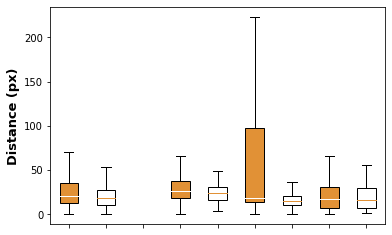

In [173]:
import matplotlib.pyplot as plt
import numpy as np

data_1 = [distances_computer, [], distances_cam2_computer, distances_cam3_computer, distances_cam1_computer]
data_2 = [distances_human, distances_cam2_human, distances_cam3_human, distances_cam1_human]


#plt.figure(figsize=(4,3))
# option 1, specify props dictionaries
c = "#e19136"
plt.boxplot(data_1, positions=[1,3,4,6,8], notch=False, patch_artist=True,
            boxprops=dict(facecolor=c, color="black"),
            #capprops=dict(color=c),
            #whiskerprops=dict(color="black"),
            #flierprops=dict(color="black", markeredgecolor="black"),
            medianprops=dict(color="w"),
            showfliers = False,
            #widths = 0.3
            )


# option 2, set all colors individually
c2 = "#9d9fa2"
box1 = plt.boxplot(data_2, positions=[2,5,7,9], notch=False, patch_artist=True, showfliers=False,
                  medianprops=dict(color="#e19136"),
                   boxprops=dict(facecolor="w", color="black"))
                  #widths = 0.3)

#plt.xlim(0.5,4)
plt.xticks([1,2,3,4,5,6,7,8,9], ["","", None,"","", "", "", "", ""], ha="left")
plt.ylabel("Distance (px)", fontweight ='bold', fontsize = 13)
plt.show()
